In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [213]:
from google.colab import drive
import os
drive.mount("/content/drive")

os.chdir("/content/drive/MyDrive/ENPM808W DATA SCIENCE/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
path="./final project/Data/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

train.head().T

,0,1,2,3,4
ID,0x4607,0xb379,0x5d6d,0x7a6a,0x70a2
Delivery_person_ID,INDORES13DEL02,BANGRES18DEL02,BANGRES19DEL01,COIMBRES13DEL02,CHENRES12DEL01
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,19-03-2022,25-03-2022,19-03-2022,05-04-2022,26-03-2022
Time_Orderd,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00


Get a view of the Data.

In [215]:
print(train['Time_taken(min)'].min(),train['Time_taken(min)'].max())

(min) 10 (min) 54


In [216]:
train['Vehicle_condition'].unique()

array([2, 0, 1, 3])

In [217]:
train['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [218]:
train['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [219]:
train.head(1).T

,0
ID,0x4607
Delivery_person_ID,INDORES13DEL02
Delivery_person_Age,37
Delivery_person_Ratings,4.9
Restaurant_latitude,22.745049
Restaurant_longitude,75.892471
Delivery_location_latitude,22.765049
Delivery_location_longitude,75.912471
Order_Date,19-03-2022
Time_Orderd,11:30:00


**We** can see that there are missing values in the data frame, so we replaced them with np.nan.

In [220]:
train.replace({"NaN": np.nan}, regex=True, inplace = True)
test.replace({"NaN": np.nan}, regex=True, inplace = True)
#replace missing values with np.nan

Perform the baseline measure.

In [221]:
train.head(0)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)


In [277]:
temp_x=train[['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Vehicle_condition','multiple_deliveries']]
temp_y=train[['Time_taken(min)']]
temp_x['Order_Date']=temp_x['Order_Date'].astype('int')

<ipython-input-277-1b85cac997b9>:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  temp_x['Order_Date']=temp_x['Order_Date'].astype('int')
<ipython-input-277-1b85cac997b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_x['Order_Date']=temp_x['Order_Date'].astype('int')


In [278]:
temp_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          41368 non-null  int64  
 1   Delivery_person_Ratings      41368 non-null  float64
 2   Restaurant_latitude          41368 non-null  float64
 3   Restaurant_longitude         41368 non-null  float64
 4   Delivery_location_latitude   41368 non-null  float64
 5   Delivery_location_longitude  41368 non-null  float64
 6   Order_Date                   41368 non-null  int64  
 7   Vehicle_condition            41368 non-null  int64  
 8   multiple_deliveries          41368 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 3.2 MB


In [279]:
X_train, X_test, y_train, y_test = train_test_split(
    temp_x, temp_y, test_size=0.33, random_state=42)

In [280]:
x=RandomForestRegressor()
x.fit(X_train, y_train.values.ravel())
pred_after=x.predict(X_test)
acc=r2_score(y_test,pred_after)
print('model=',x,'acc=',acc)

model= RandomForestRegressor() acc= 0.4777799064901965


The baseline measurement is 0.4777799064901965.

In [225]:
train.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [226]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

We should also deal with date in the train. 

In [227]:
#i will parse this train to year/month/day
train["Order_Date"]=pd.to_datetime(train.Order_Date, dayfirst=True)
test["Order_Date"]=pd.to_datetime(test.Order_Date, dayfirst=True)

In [228]:
train["Order_Date"]

0       2022-03-19
1       2022-03-25
2       2022-03-19
3       2022-04-05
4       2022-03-26
           ...    
45588   2022-03-24
45589   2022-02-16
45590   2022-03-11
45591   2022-03-07
45592   2022-03-02
Name: Order_Date, Length: 45593, dtype: datetime64[ns]

Differentiate the year/month/day to better understand the taken time.

In [229]:
train["Order_year"]=train.Order_Date.dt.year
train["Order_month"]=train.Order_Date.dt.month
train["Order_day"]=train.Order_Date.dt.day

#test
test["Order_year"]=test.Order_Date.dt.year
test["Order_month"]=test.Order_Date.dt.month
test["Order_day"]=test.Order_Date.dt.day

Trim the taken time column.

In [230]:
train['Time_taken(min)']=train['Time_taken(min)'].str.split(" ", expand=True)[1]


In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  object        
 3   Delivery_person_Ratings      43685 non-null  object        
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            44977 non-nu

In [232]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           10291 non-null  object        
 1   Delivery_person_ID           10291 non-null  object        
 2   Delivery_person_Age          10291 non-null  int64         
 3   Delivery_person_Ratings      10291 non-null  float64       
 4   Restaurant_latitude          10291 non-null  float64       
 5   Restaurant_longitude         10291 non-null  float64       
 6   Delivery_location_latitude   10291 non-null  float64       
 7   Delivery_location_longitude  10291 non-null  float64       
 8   Order_Date                   10291 non-null  datetime64[ns]
 9   Time_Orderd                  10291 non-null  object        
 10  Time_Order_picked            10291 non-null  object        
 11  Weatherconditions            10291 non-nu

In [233]:
train.head().T

,0,1,2,3,4
ID,0x4607,0xb379,0x5d6d,0x7a6a,0x70a2
Delivery_person_ID,INDORES13DEL02,BANGRES18DEL02,BANGRES19DEL01,COIMBRES13DEL02,CHENRES12DEL01
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,2022-03-19 00:00:00,2022-03-25 00:00:00,2022-03-19 00:00:00,2022-04-05 00:00:00,2022-03-26 00:00:00
Time_Orderd,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00


Trainsfer to categorical.

In [234]:
train['Weatherconditions']

0             conditions Sunny
1            conditions Stormy
2        conditions Sandstorms
3             conditions Sunny
4            conditions Cloudy
                 ...          
45588         conditions Windy
45589         conditions Windy
45590        conditions Cloudy
45591        conditions Cloudy
45592           conditions Fog
Name: Weatherconditions, Length: 45593, dtype: object

In [235]:
for label,content in train.items():
    if pd.api.types.is_string_dtype(content):
        train[label]=content.astype("category").cat.as_ordered()    

for label,content in test.items():
    if pd.api.types.is_string_dtype(content):
        test[label]=content.astype("category").cat.as_ordered()    

In [236]:
train['Weatherconditions']

0             conditions Sunny
1            conditions Stormy
2        conditions Sandstorms
3             conditions Sunny
4            conditions Cloudy
                 ...          
45588         conditions Windy
45589         conditions Windy
45590        conditions Cloudy
45591        conditions Cloudy
45592           conditions Fog
Name: Weatherconditions, Length: 45593, dtype: category
Categories (6, object): ['conditions Cloudy' < 'conditions Fog' < 'conditions Sandstorms' <
                         'conditions Stormy' < 'conditions Sunny' < 'conditions Windy']

In [237]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           10291 non-null  category      
 1   Delivery_person_ID           10291 non-null  category      
 2   Delivery_person_Age          10291 non-null  int64         
 3   Delivery_person_Ratings      10291 non-null  float64       
 4   Restaurant_latitude          10291 non-null  float64       
 5   Restaurant_longitude         10291 non-null  float64       
 6   Delivery_location_latitude   10291 non-null  float64       
 7   Delivery_location_longitude  10291 non-null  float64       
 8   Order_Date                   10291 non-null  datetime64[ns]
 9   Time_Orderd                  10291 non-null  category      
 10  Time_Order_picked            10291 non-null  category      
 11  Weatherconditions            10291 non-nu

We dedcide to drop NaN values, since we have around 55,000 data.

In [238]:
train=train.dropna()
test=test.dropna()

In [239]:
train.head().T

,0,1,2,3,4
ID,0x4607,0xb379,0x5d6d,0x7a6a,0x70a2
Delivery_person_ID,INDORES13DEL02,BANGRES18DEL02,BANGRES19DEL01,COIMBRES13DEL02,CHENRES12DEL01
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,2022-03-19 00:00:00,2022-03-25 00:00:00,2022-03-19 00:00:00,2022-04-05 00:00:00,2022-03-26 00:00:00
Time_Orderd,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00


label encode columns

In [240]:
from sklearn import preprocessing
all = pd.concat([test, test], axis=0, ignore_index=True)
Delivery_person_ID_encoder = preprocessing.LabelEncoder().fit(all['Delivery_person_ID'])
Weatherconditions_encoder=preprocessing.LabelEncoder().fit(all['Weatherconditions'])
# Road_traffic_density_encoder=preprocessing.LabelEncoder().fit(all['Road_traffic_density'])
Type_of_order_encoder=preprocessing.LabelEncoder().fit(all['Type_of_order'])
Type_of_vehicle_encoder=preprocessing.LabelEncoder().fit(all['Type_of_vehicle'])
City_encoder=preprocessing.LabelEncoder().fit(all['City'])


train['label_Delivery_person_ID']= Delivery_person_ID_encoder.fit_transform(train['Delivery_person_ID'])
train['label_Weatherconditions']= Weatherconditions_encoder.fit_transform(train['Weatherconditions'])
# train['label_Road_traffic_density']= Road_traffic_density_encoder.fit_transform(train['Road_traffic_density'])
train['label_Type_of_order']= Type_of_order_encoder.fit_transform(train['Type_of_order'])
train['label_Type_of_vehicle']= Type_of_vehicle_encoder.fit_transform(train['Type_of_vehicle'])
train['label_City']= City_encoder.fit_transform(train['City'])

test['label_Delivery_person_ID']= Delivery_person_ID_encoder.fit_transform(test['Delivery_person_ID'])
test['label_Weatherconditions']= Weatherconditions_encoder.fit_transform(test['Weatherconditions'])
# test['label_Road_traffic_density']= Road_traffic_density_encoder.fit_transform(test['Road_traffic_density'])
test['label_Type_of_order']= Type_of_order_encoder.fit_transform(test['Type_of_order'])
test['label_Type_of_vehicle']= Type_of_vehicle_encoder.fit_transform(test['Type_of_vehicle'])
test['label_City']= City_encoder.fit_transform(test['City'])


<ipython-input-240-9eb525b5eb47>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label_Delivery_person_ID']= Delivery_person_ID_encoder.fit_transform(train['Delivery_person_ID'])
<ipython-input-240-9eb525b5eb47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label_Weatherconditions']= Weatherconditions_encoder.fit_transform(train['Weatherconditions'])
<ipython-input-240-9eb525b5eb47>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [241]:
dict(zip(Weatherconditions_encoder.classes_, Weatherconditions_encoder.transform(Weatherconditions_encoder.classes_)))


{'conditions Cloudy': 0,
 'conditions Fog': 1,
 'conditions Sandstorms': 2,
 'conditions Stormy': 3,
 'conditions Sunny': 4,
 'conditions Windy': 5}

In [242]:
dict(zip(Type_of_order_encoder.classes_, Type_of_order_encoder.transform(Type_of_order_encoder.classes_)))


{'Buffet ': 0, 'Drinks ': 1, 'Meal ': 2, 'Snack ': 3}

In [243]:
dict(zip(Type_of_vehicle_encoder.classes_, Type_of_vehicle_encoder.transform(Type_of_vehicle_encoder.classes_)))

{'electric_scooter ': 0, 'motorcycle ': 1, 'scooter ': 2}

In [244]:
dict(zip(City_encoder.classes_, City_encoder.transform(City_encoder.classes_)))

{'Metropolitian ': 0, 'Semi-Urban ': 1, 'Urban ': 2}

Let label encoder that sortes the traffic densifty.

In [245]:
all['Road_traffic_density'].unique()

['Jam ', 'Medium ', 'Low ', 'High ']
Categories (4, object): ['High ' < 'Jam ' < 'Low ' < 'Medium ']

In [246]:
Road_traffic_density_encoder=preprocessing.LabelEncoder().fit(all['Road_traffic_density'])


Road_traffic_density_encoder.classes_=np.array(['Low ', 'Medium ','High ','Jam '])

train['label_Road_traffic_density']= Road_traffic_density_encoder.transform(train['Road_traffic_density'])
test['label_Road_traffic_density']= Road_traffic_density_encoder.transform(test['Road_traffic_density'])

In [247]:
train.head().T

,0,1,2,3,4
ID,0x4607,0xb379,0x5d6d,0x7a6a,0x70a2
Delivery_person_ID,INDORES13DEL02,BANGRES18DEL02,BANGRES19DEL01,COIMBRES13DEL02,CHENRES12DEL01
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,2022-03-19 00:00:00,2022-03-25 00:00:00,2022-03-19 00:00:00,2022-04-05 00:00:00,2022-03-26 00:00:00
Time_Orderd,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00


Assure the column type are corrrect.

In [248]:
train['bool_Festival']=train['Festival'].astype('bool')
test['bool_Festival']=test['Festival'].astype('bool')
train['Time_taken(min)']=train['Time_taken(min)'].astype('int')
train['Delivery_person_Age'] = train['Delivery_person_Age'].astype(int)
test['Delivery_person_Age'] = test['Delivery_person_Age'].astype(int)
train['Delivery_person_Ratings'] =train['Delivery_person_Ratings'].astype(float)
test['Delivery_person_Ratings'] =test['Delivery_person_Ratings'].astype(float)
train['multiple_deliveries'] = train['multiple_deliveries'].astype(int)
test['multiple_deliveries'] = test['multiple_deliveries'].astype(int)

In [249]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  category      
 1   Delivery_person_ID           41368 non-null  category      
 2   Delivery_person_Age          41368 non-null  int64         
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Orderd                  41368 non-null  category      
 10  Time_Order_picked            41368 non-null  category      
 11  Weatherconditions            41368 non-nu

In [250]:
train.head().T

,0,1,2,3,4
ID,0x4607,0xb379,0x5d6d,0x7a6a,0x70a2
Delivery_person_ID,INDORES13DEL02,BANGRES18DEL02,BANGRES19DEL01,COIMBRES13DEL02,CHENRES12DEL01
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,2022-03-19 00:00:00,2022-03-25 00:00:00,2022-03-19 00:00:00,2022-04-05 00:00:00,2022-03-26 00:00:00
Time_Orderd,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00


In [251]:
corr_df=train[['label_Delivery_person_ID','Delivery_person_Age','Delivery_person_Ratings','label_Weatherconditions','label_Road_traffic_density','Vehicle_condition','label_Type_of_order','label_Type_of_vehicle','label_City','multiple_deliveries','bool_Festival','Order_year','Order_month','Order_day','Time_taken(min)']]
corr_df.head().T


,0,1,2,3,4
label_Delivery_person_ID,637,232,234,397,333
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
label_Weatherconditions,4,3,2,4,0
label_Road_traffic_density,2,3,0,1,2
Vehicle_condition,2,2,0,0,1
label_Type_of_order,3,3,1,0,3
label_Type_of_vehicle,1,2,1,1,2
label_City,2,0,2,0,0
multiple_deliveries,0,1,1,1,1


Correlation heatmap for columns.

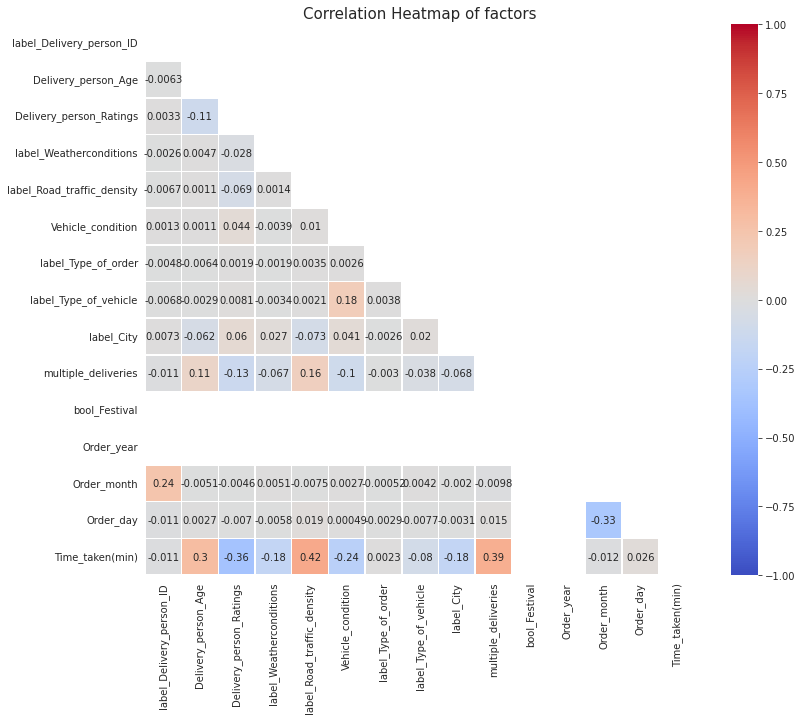

In [252]:
df_corr = corr_df.corr()
df_corr
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(df_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of factors', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

## Fixed Straight Line Distance Calculation

A function for getting the direct geo-distance.

In [253]:
import geopy.distance
def fixed_distance_calculator(lat1,lon1,lat2,lon2):
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    return geopy.distance.geodesic(coords_1, coords_2).km

# Add country name to hyperparameter by using latitude and longtitude


We tried to define the country of the delivery; however, it took up too long to apply this funcyion, so we did not use it.

In [254]:
from geopy.geocoders import Nominatim
def find_country_name(lat1,lon1):
  geolocator = Nominatim(user_agent="geoapiExercises",timeout = 10)
  location = geolocator.reverse(str(lat1)+","+str(lon1))

  return location

In [255]:
train.head().T

,0,1,2,3,4
ID,0x4607,0xb379,0x5d6d,0x7a6a,0x70a2
Delivery_person_ID,INDORES13DEL02,BANGRES18DEL02,BANGRES19DEL01,COIMBRES13DEL02,CHENRES12DEL01
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,2022-03-19 00:00:00,2022-03-25 00:00:00,2022-03-19 00:00:00,2022-04-05 00:00:00,2022-03-26 00:00:00
Time_Orderd,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00


In [256]:
train['Geo_distance']=train.apply(lambda x: fixed_distance_calculator(x.Restaurant_latitude, x.Restaurant_longitude,x.Delivery_location_latitude,x.Delivery_location_longitude), axis=1)

test['Geo_distance']=test.apply(lambda x: fixed_distance_calculator(x.Restaurant_latitude, x.Restaurant_longitude,x.Delivery_location_latitude,x.Delivery_location_longitude), axis=1)


In [257]:
train.head().T

,0,1,2,3,4
ID,0x4607,0xb379,0x5d6d,0x7a6a,0x70a2
Delivery_person_ID,INDORES13DEL02,BANGRES18DEL02,BANGRES19DEL01,COIMBRES13DEL02,CHENRES12DEL01
Delivery_person_Age,37,34,23,38,32
Delivery_person_Ratings,4.9,4.5,4.4,4.7,4.6
Restaurant_latitude,22.745049,12.913041,12.914264,11.003669,12.972793
Restaurant_longitude,75.892471,77.683237,77.6784,76.976494,80.249982
Delivery_location_latitude,22.765049,13.043041,12.924264,11.053669,13.012793
Delivery_location_longitude,75.912471,77.813237,77.6884,77.026494,80.289982
Order_Date,2022-03-19 00:00:00,2022-03-25 00:00:00,2022-03-19 00:00:00,2022-04-05 00:00:00,2022-03-26 00:00:00
Time_Orderd,11:30:00,19:45:00,08:30:00,18:00:00,13:30:00


In [258]:
test.head().T

,0,1,2,3,4
ID,0x3474,0x9420,0x72ee,0xa759,0xc4af
Delivery_person_ID,BANGRES15DEL01,JAPRES09DEL03,JAPRES07DEL03,CHENRES19DEL01,GOARES04DEL01
Delivery_person_Age,28,23,21,31,26
Delivery_person_Ratings,4.6,4.5,4.8,4.6,4.7
Restaurant_latitude,12.975377,26.911378,26.766536,12.986047,15.5696
Restaurant_longitude,77.696664,75.789034,75.837333,80.218114,73.742294
Delivery_location_latitude,13.085377,27.001378,26.856536,13.096047,15.5796
Delivery_location_longitude,77.806664,75.879034,75.927333,80.328114,73.752294
Order_Date,2022-03-29 00:00:00,2022-03-10 00:00:00,2022-04-02 00:00:00,2022-03-27 00:00:00,2022-02-15 00:00:00
Time_Orderd,20:30:00,19:35:00,17:15:00,18:25:00,09:45:00


In [259]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  category      
 1   Delivery_person_ID           41368 non-null  category      
 2   Delivery_person_Age          41368 non-null  int64         
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Orderd                  41368 non-null  category      
 10  Time_Order_picked            41368 non-null  category      
 11  Weatherconditions            41368 non-nu

In [260]:
test.head().T

,0,1,2,3,4
ID,0x3474,0x9420,0x72ee,0xa759,0xc4af
Delivery_person_ID,BANGRES15DEL01,JAPRES09DEL03,JAPRES07DEL03,CHENRES19DEL01,GOARES04DEL01
Delivery_person_Age,28,23,21,31,26
Delivery_person_Ratings,4.6,4.5,4.8,4.6,4.7
Restaurant_latitude,12.975377,26.911378,26.766536,12.986047,15.5696
Restaurant_longitude,77.696664,75.789034,75.837333,80.218114,73.742294
Delivery_location_latitude,13.085377,27.001378,26.856536,13.096047,15.5796
Delivery_location_longitude,77.806664,75.879034,75.927333,80.328114,73.752294
Order_Date,2022-03-29 00:00:00,2022-03-10 00:00:00,2022-04-02 00:00:00,2022-03-27 00:00:00,2022-02-15 00:00:00
Time_Orderd,20:30:00,19:35:00,17:15:00,18:25:00,09:45:00


In [261]:
from sklearn.model_selection import train_test_split
X=train[['Delivery_person_Age','Delivery_person_Ratings','label_Weatherconditions','label_Road_traffic_density','Vehicle_condition','label_Type_of_order','label_Type_of_vehicle','label_City','multiple_deliveries','Geo_distance']]
y=train[['Time_taken(min)']]
test_cleaned=test[['Delivery_person_Age','Delivery_person_Ratings','label_Weatherconditions','label_Road_traffic_density','Vehicle_condition','label_Type_of_order','label_Type_of_vehicle','label_City','multiple_deliveries','Geo_distance']]

In [262]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Delivery_person_Age         41368 non-null  int64  
 1   Delivery_person_Ratings     41368 non-null  float64
 2   label_Weatherconditions     41368 non-null  int64  
 3   label_Road_traffic_density  41368 non-null  int64  
 4   Vehicle_condition           41368 non-null  int64  
 5   label_Type_of_order         41368 non-null  int64  
 6   label_Type_of_vehicle       41368 non-null  int64  
 7   label_City                  41368 non-null  int64  
 8   multiple_deliveries         41368 non-null  int64  
 9   Geo_distance                41368 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 3.5 MB


In [263]:
X.head().T

,0,1,2,3,4
Delivery_person_Age,37.000000,34.000000,23.000000,38.000000,32.000000
Delivery_person_Ratings,4.900000,4.500000,4.400000,4.700000,4.600000
label_Weatherconditions,4.000000,3.000000,2.000000,4.000000,0.000000
label_Road_traffic_density,2.000000,3.000000,0.000000,1.000000,2.000000
Vehicle_condition,2.000000,2.000000,0.000000,0.000000,1.000000
label_Type_of_order,3.000000,3.000000,1.000000,0.000000,3.000000
label_Type_of_vehicle,1.000000,2.000000,1.000000,1.000000,2.000000
label_City,2.000000,0.000000,2.000000,0.000000,0.000000
multiple_deliveries,0.000000,1.000000,1.000000,1.000000,1.000000
Geo_distance,3.020737,20.143737,1.549693,7.774497,6.197898


In [264]:
test_cleaned.head().T

,0,1,2,3,4
Delivery_person_Age,28.000000,23.000000,21.000000,31.000000,26.00000
Delivery_person_Ratings,4.600000,4.500000,4.800000,4.600000,4.70000
label_Weatherconditions,5.000000,3.000000,1.000000,4.000000,1.00000
label_Road_traffic_density,3.000000,3.000000,1.000000,1.000000,0.00000
Vehicle_condition,0.000000,0.000000,1.000000,2.000000,0.00000
label_Type_of_order,3.000000,1.000000,2.000000,1.000000,1.00000
label_Type_of_vehicle,1.000000,1.000000,2.000000,2.000000,1.00000
label_City,0.000000,0.000000,0.000000,0.000000,0.00000
multiple_deliveries,1.000000,1.000000,1.000000,1.000000,1.00000
Geo_distance,17.042985,13.390474,13.397932,17.042634,1.54106


In [265]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Store the data for future use.

In [266]:
X_train.to_csv(path+'X_train.csv',index=False)
X_test.to_csv(path+'X_test.csv',index=False)
y_train.to_csv(path+'y_train.csv',index=False)
y_test.to_csv(path+'y_test.csv',index=False)
test_cleaned.to_csv(path+'test_cleaned.csv',index=False)
X.to_csv(path+'X.csv',index=False)